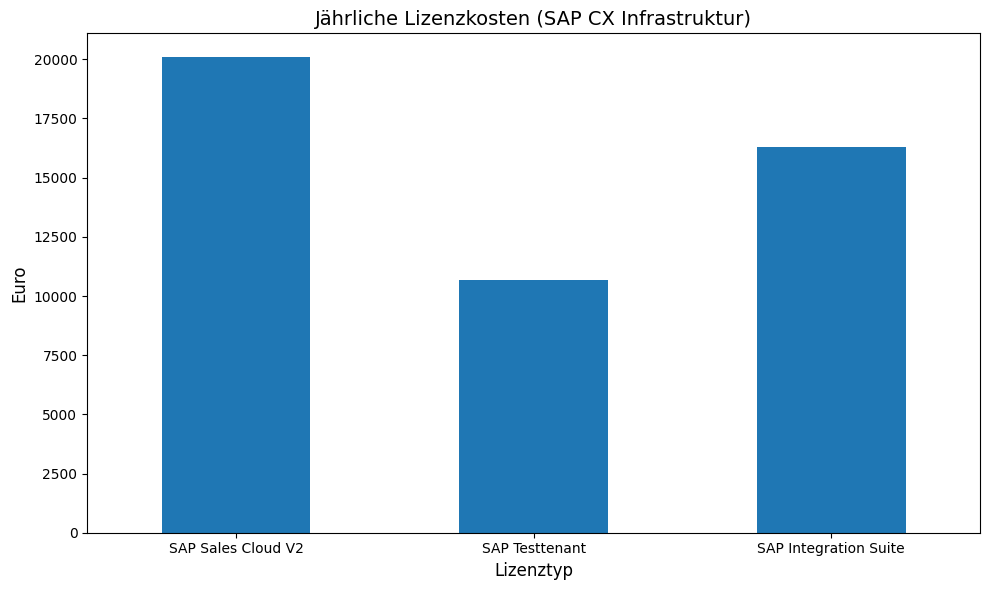

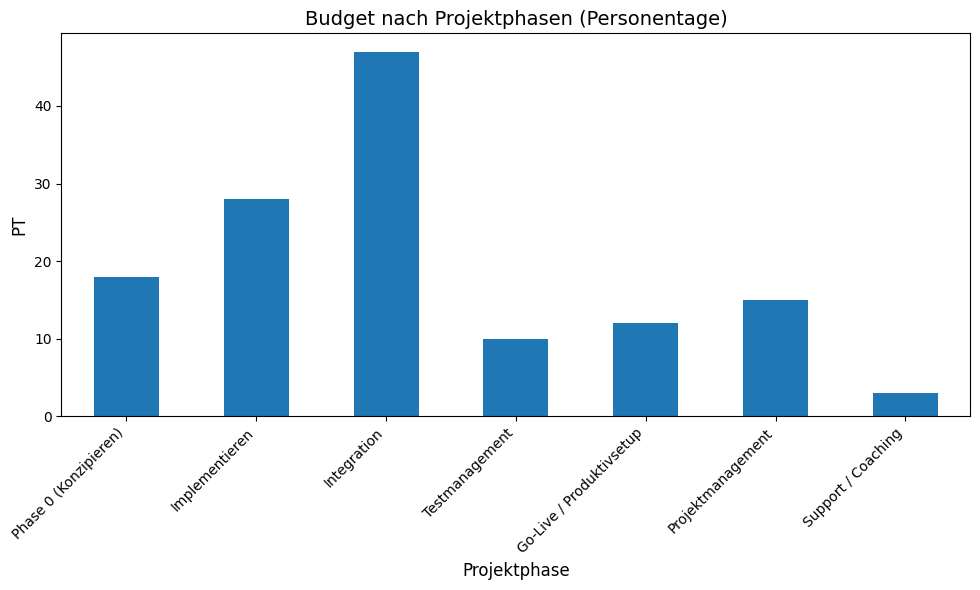

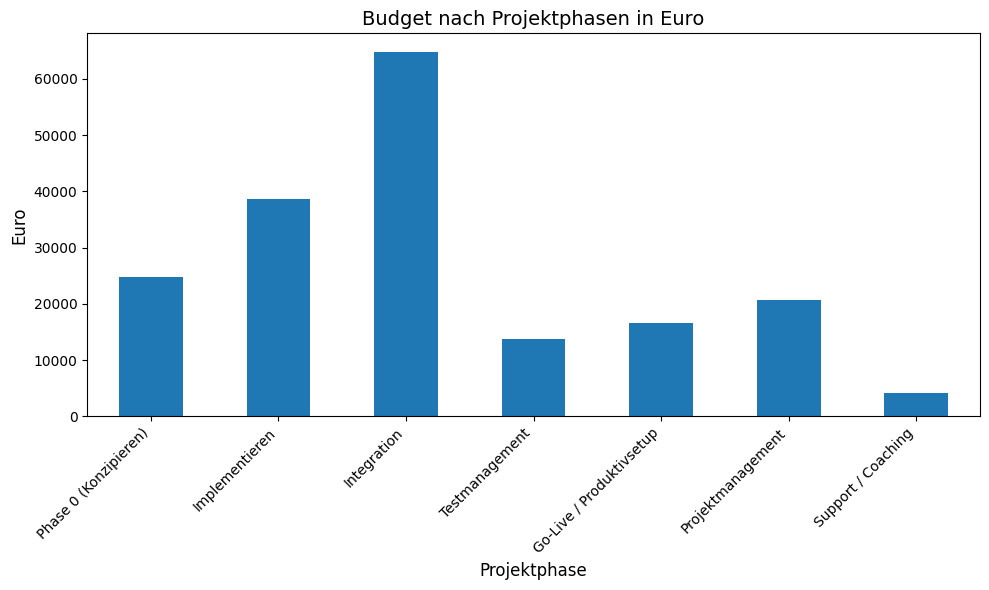

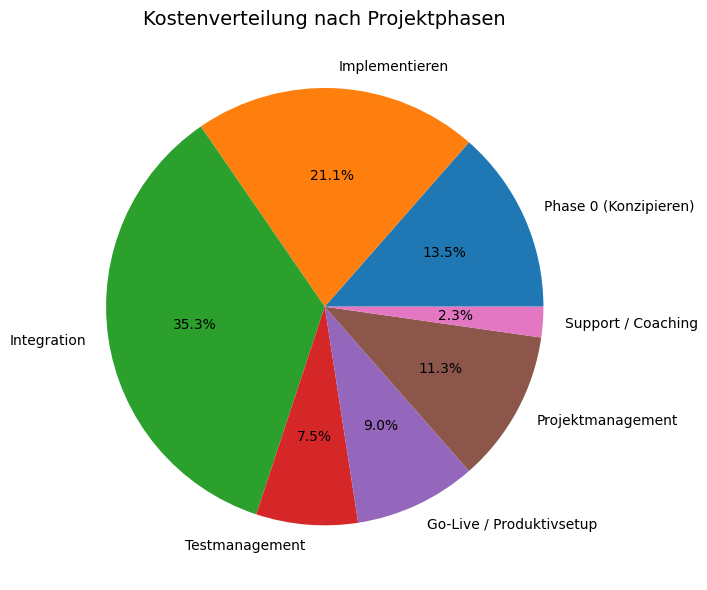

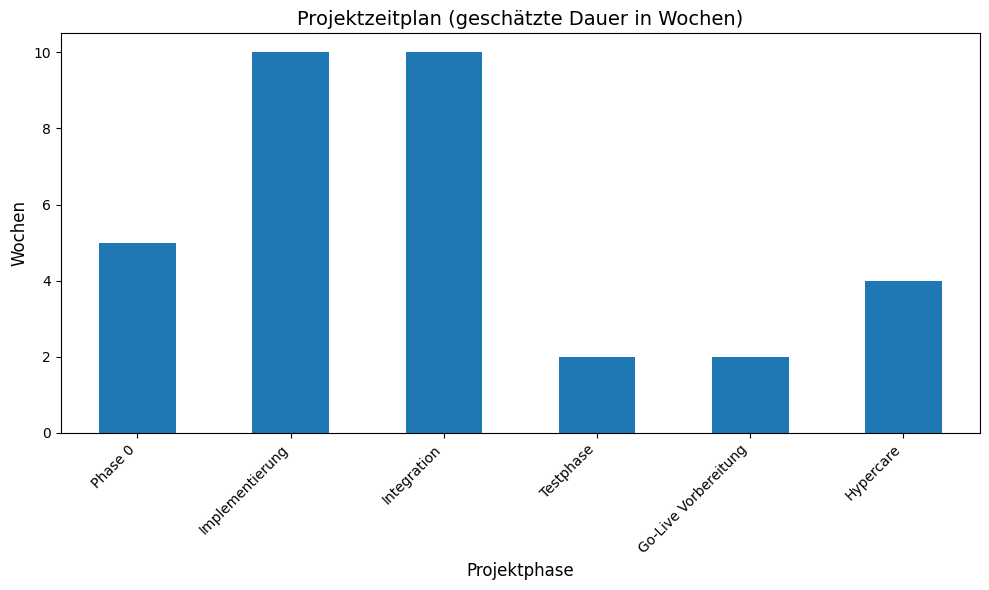

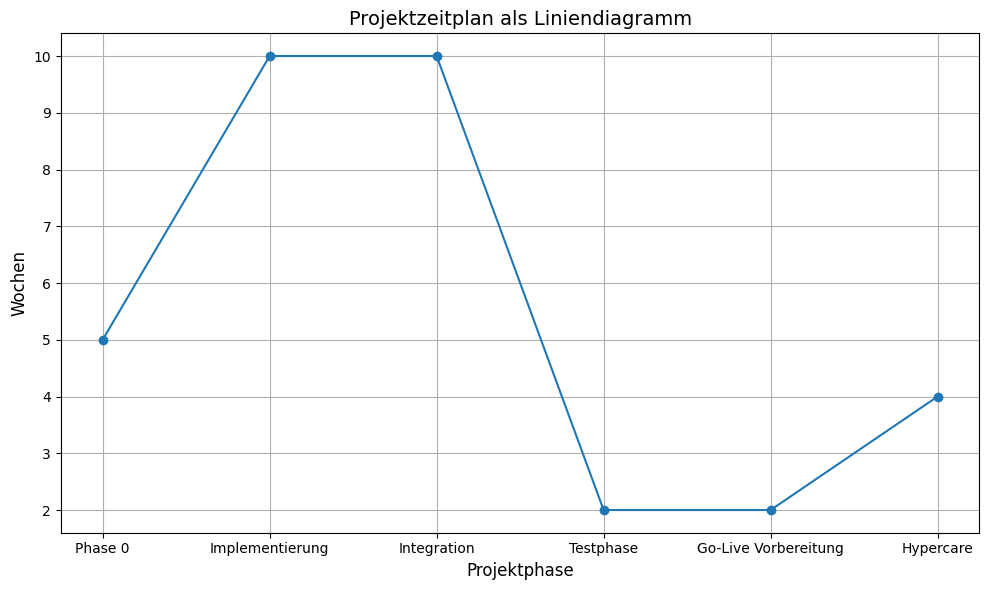

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

# Set default style (optional)
plt.rcParams.update({
    "figure.figsize": (10, 6),
    "axes.titlesize": 14,
    "axes.labelsize": 12,
    "xtick.labelsize": 10,
    "ytick.labelsize": 10
})

# ============================================================
# 1) JÄHRLICHE LIZENZKOSTEN
# ============================================================

license_costs = {
    "SAP Sales Cloud V2": 20091.96,
    "SAP Testtenant": 10660.44,
    "SAP Integration Suite": 16294.32
}

df_licenses = pd.DataFrame.from_dict(license_costs, orient="index", columns=["Kosten (€)"])

plt.figure()
df_licenses["Kosten (€)"].plot(kind="bar")
plt.title("Jährliche Lizenzkosten (SAP CX Infrastruktur)")
plt.ylabel("Euro")
plt.xlabel("Lizenztyp")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# ============================================================
# 2) BUDGET NACH PROJEKTPHASEN
# ============================================================

# Personentage (PT) aus dem Angebot
pt_cost = 1380  # 1 Personentag kostet 1380 € (laut Angebot: 20.700 € / 15 PT)

phases_pt = {
    "Phase 0 (Konzipieren)": 18,
    "Implementieren": 28,
    "Integration": 47,
    "Testmanagement": 10,
    "Go-Live / Produktivsetup": 12,
    "Projektmanagement": 15,
    "Support / Coaching": 3
}

df_budget = pd.DataFrame.from_dict(phases_pt, orient="index", columns=["PT"])
df_budget["Kosten (€)"] = df_budget["PT"] * pt_cost

# Bar chart PT
plt.figure()
df_budget["PT"].plot(kind="bar")
plt.title("Budget nach Projektphasen (Personentage)")
plt.ylabel("PT")
plt.xlabel("Projektphase")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# Bar chart Kosten
plt.figure()
df_budget["Kosten (€)"].plot(kind="bar")
plt.title("Budget nach Projektphasen in Euro")
plt.ylabel("Euro")
plt.xlabel("Projektphase")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# Pie chart
plt.figure()
df_budget["Kosten (€)"].plot(kind="pie", autopct="%1.1f%%")
plt.title("Kostenverteilung nach Projektphasen")
plt.ylabel("")  # hide y-axis label
plt.tight_layout()
plt.show()

# ============================================================
# 3) PROJEKTZEITPLAN (PHASEN-DAUER)
# ============================================================

# Approx. duration derived from workload and typical Sybit timing
timeline_weeks = {
    "Phase 0": 5,             # 4–6 weeks → average 5
    "Implementierung": 10,    # 8–12 weeks → average 10
    "Integration": 10,        # integrated into sprints (~10)
    "Testphase": 2,
    "Go-Live Vorbereitung": 2,
    "Hypercare": 4
}

df_timeline = pd.DataFrame.from_dict(timeline_weeks, orient="index", columns=["Wochen"])

plt.figure()
df_timeline["Wochen"].plot(kind="bar")
plt.title("Projektzeitplan (geschätzte Dauer in Wochen)")
plt.ylabel("Wochen")
plt.xlabel("Projektphase")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# Line chart timeline
plt.figure()
df_timeline["Wochen"].plot(kind="line", marker="o")
plt.title("Projektzeitplan als Liniendiagramm")
plt.ylabel("Wochen")
plt.xlabel("Projektphase")
plt.grid(True)
plt.tight_layout()
plt.show()


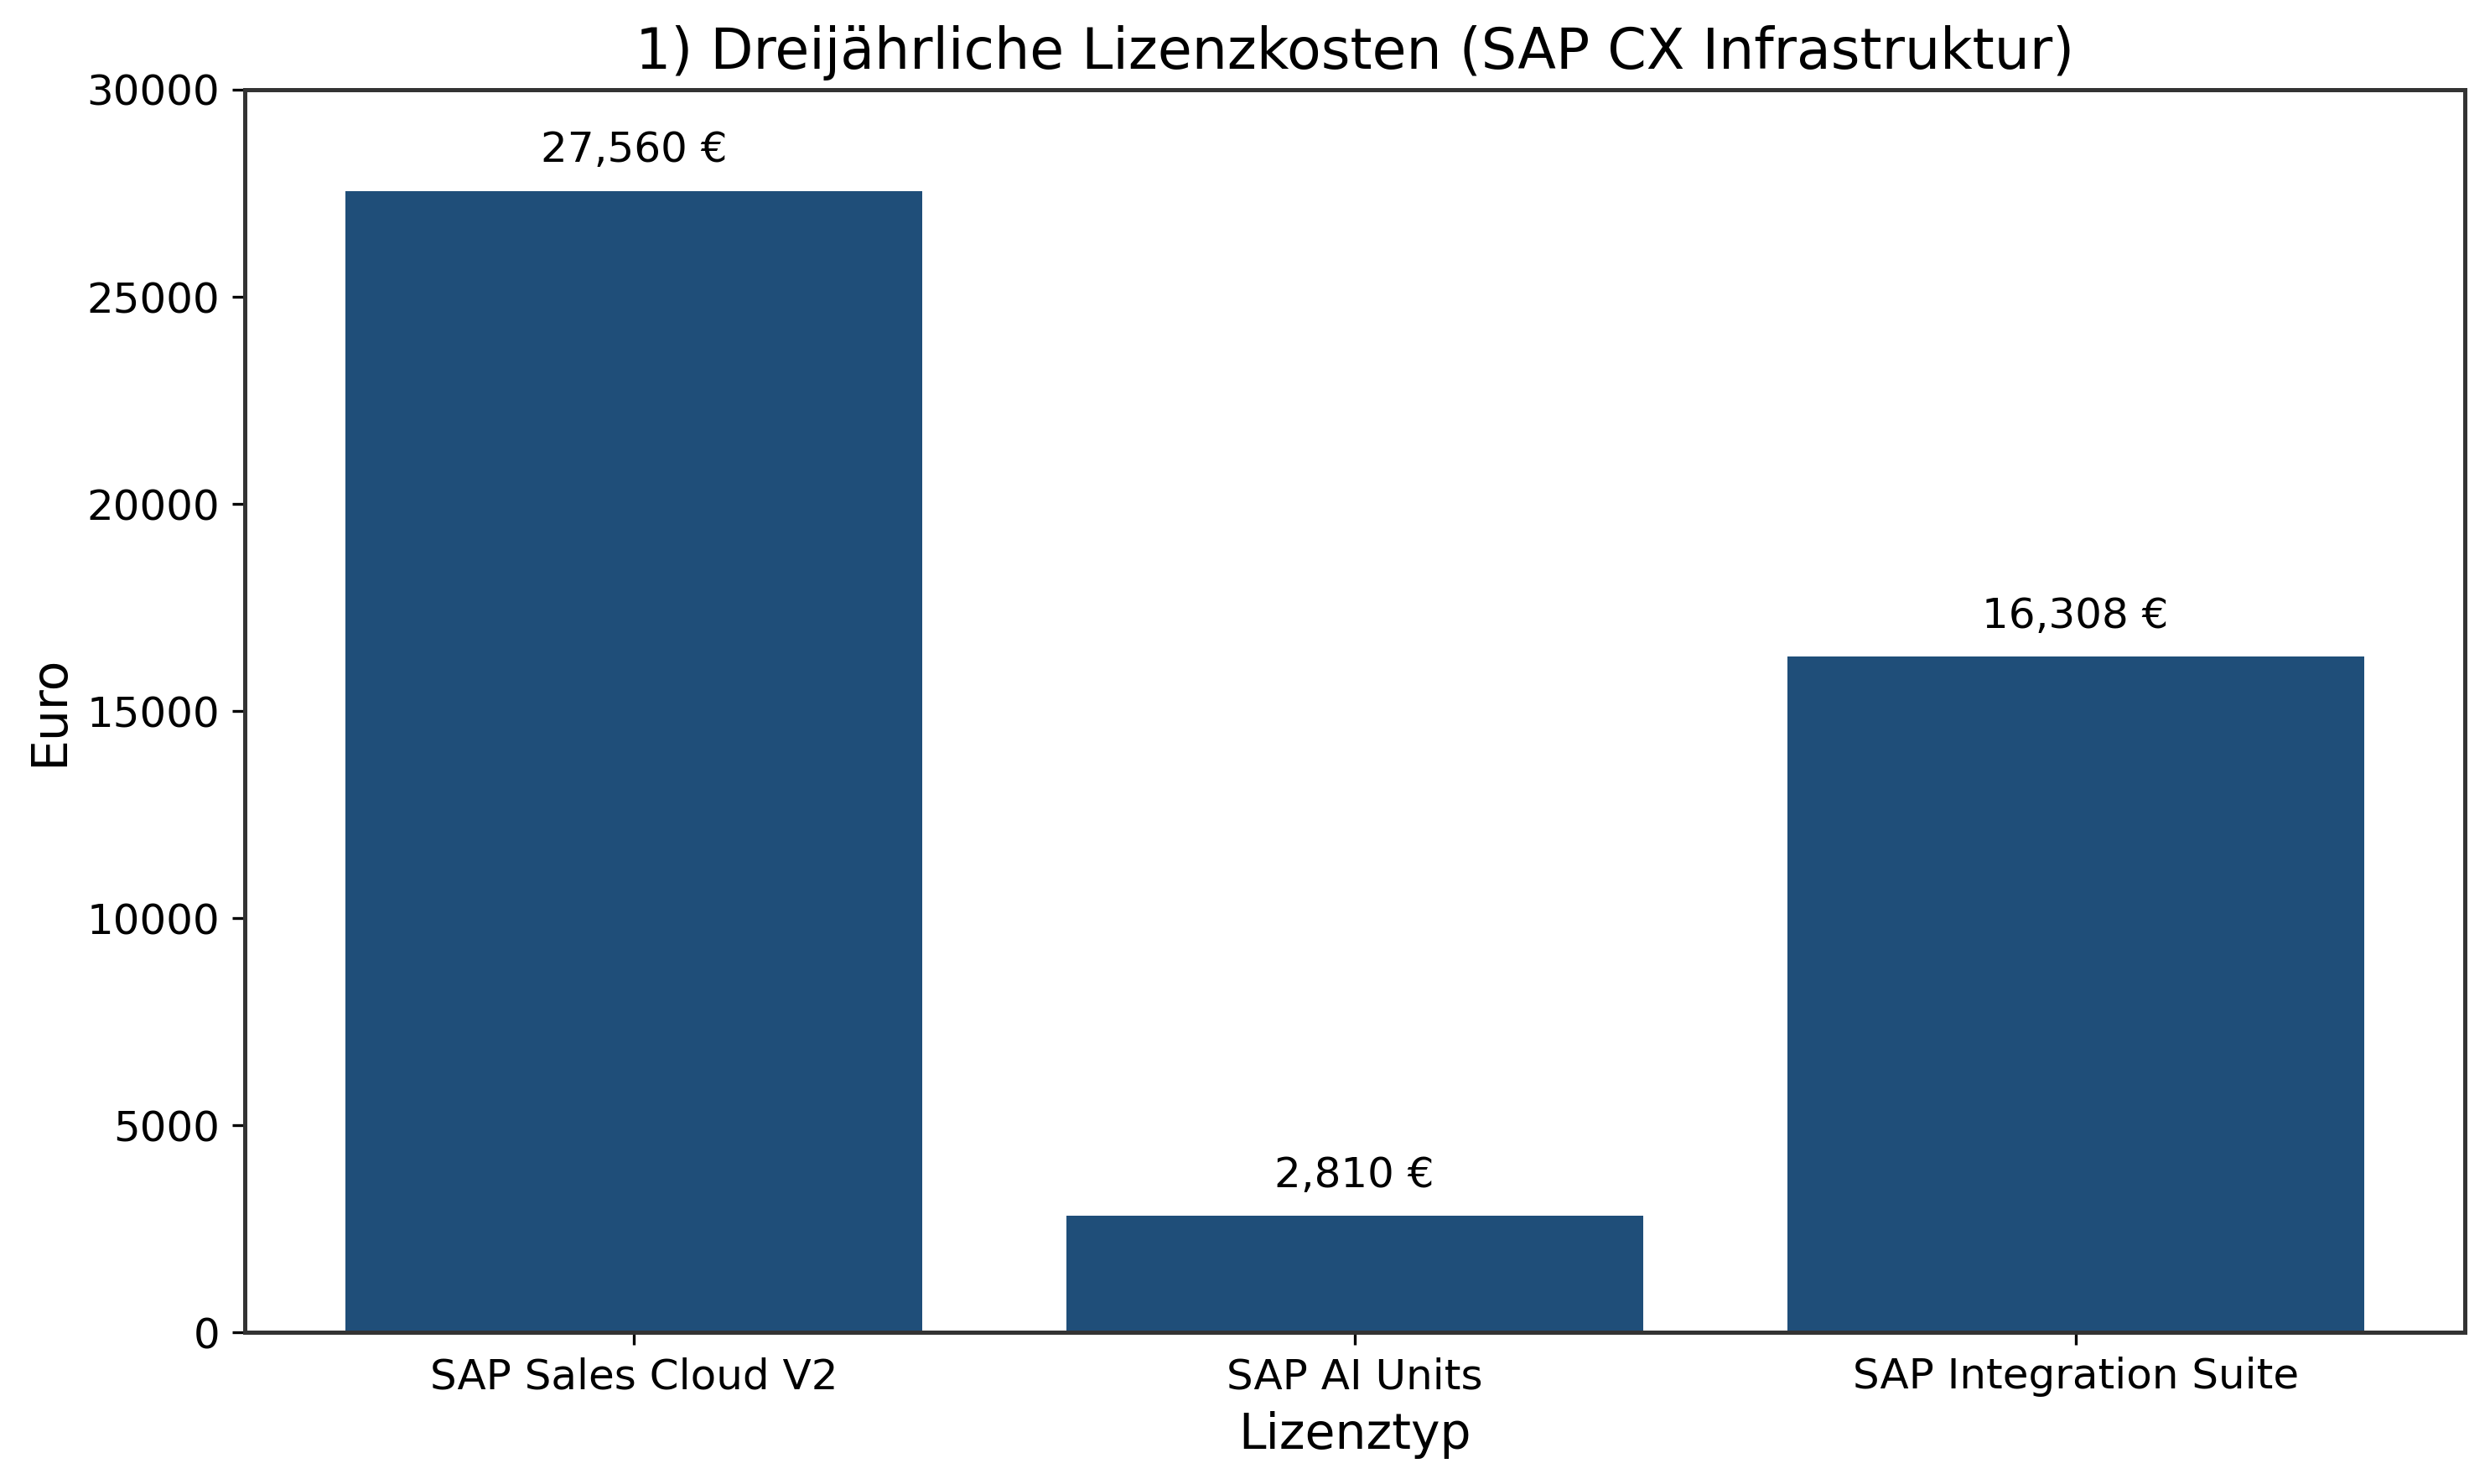

Kurzfassung Lizenzkosten:
Die SAP Sales Cloud verursacht den größten jährlichen Kostenanteil.



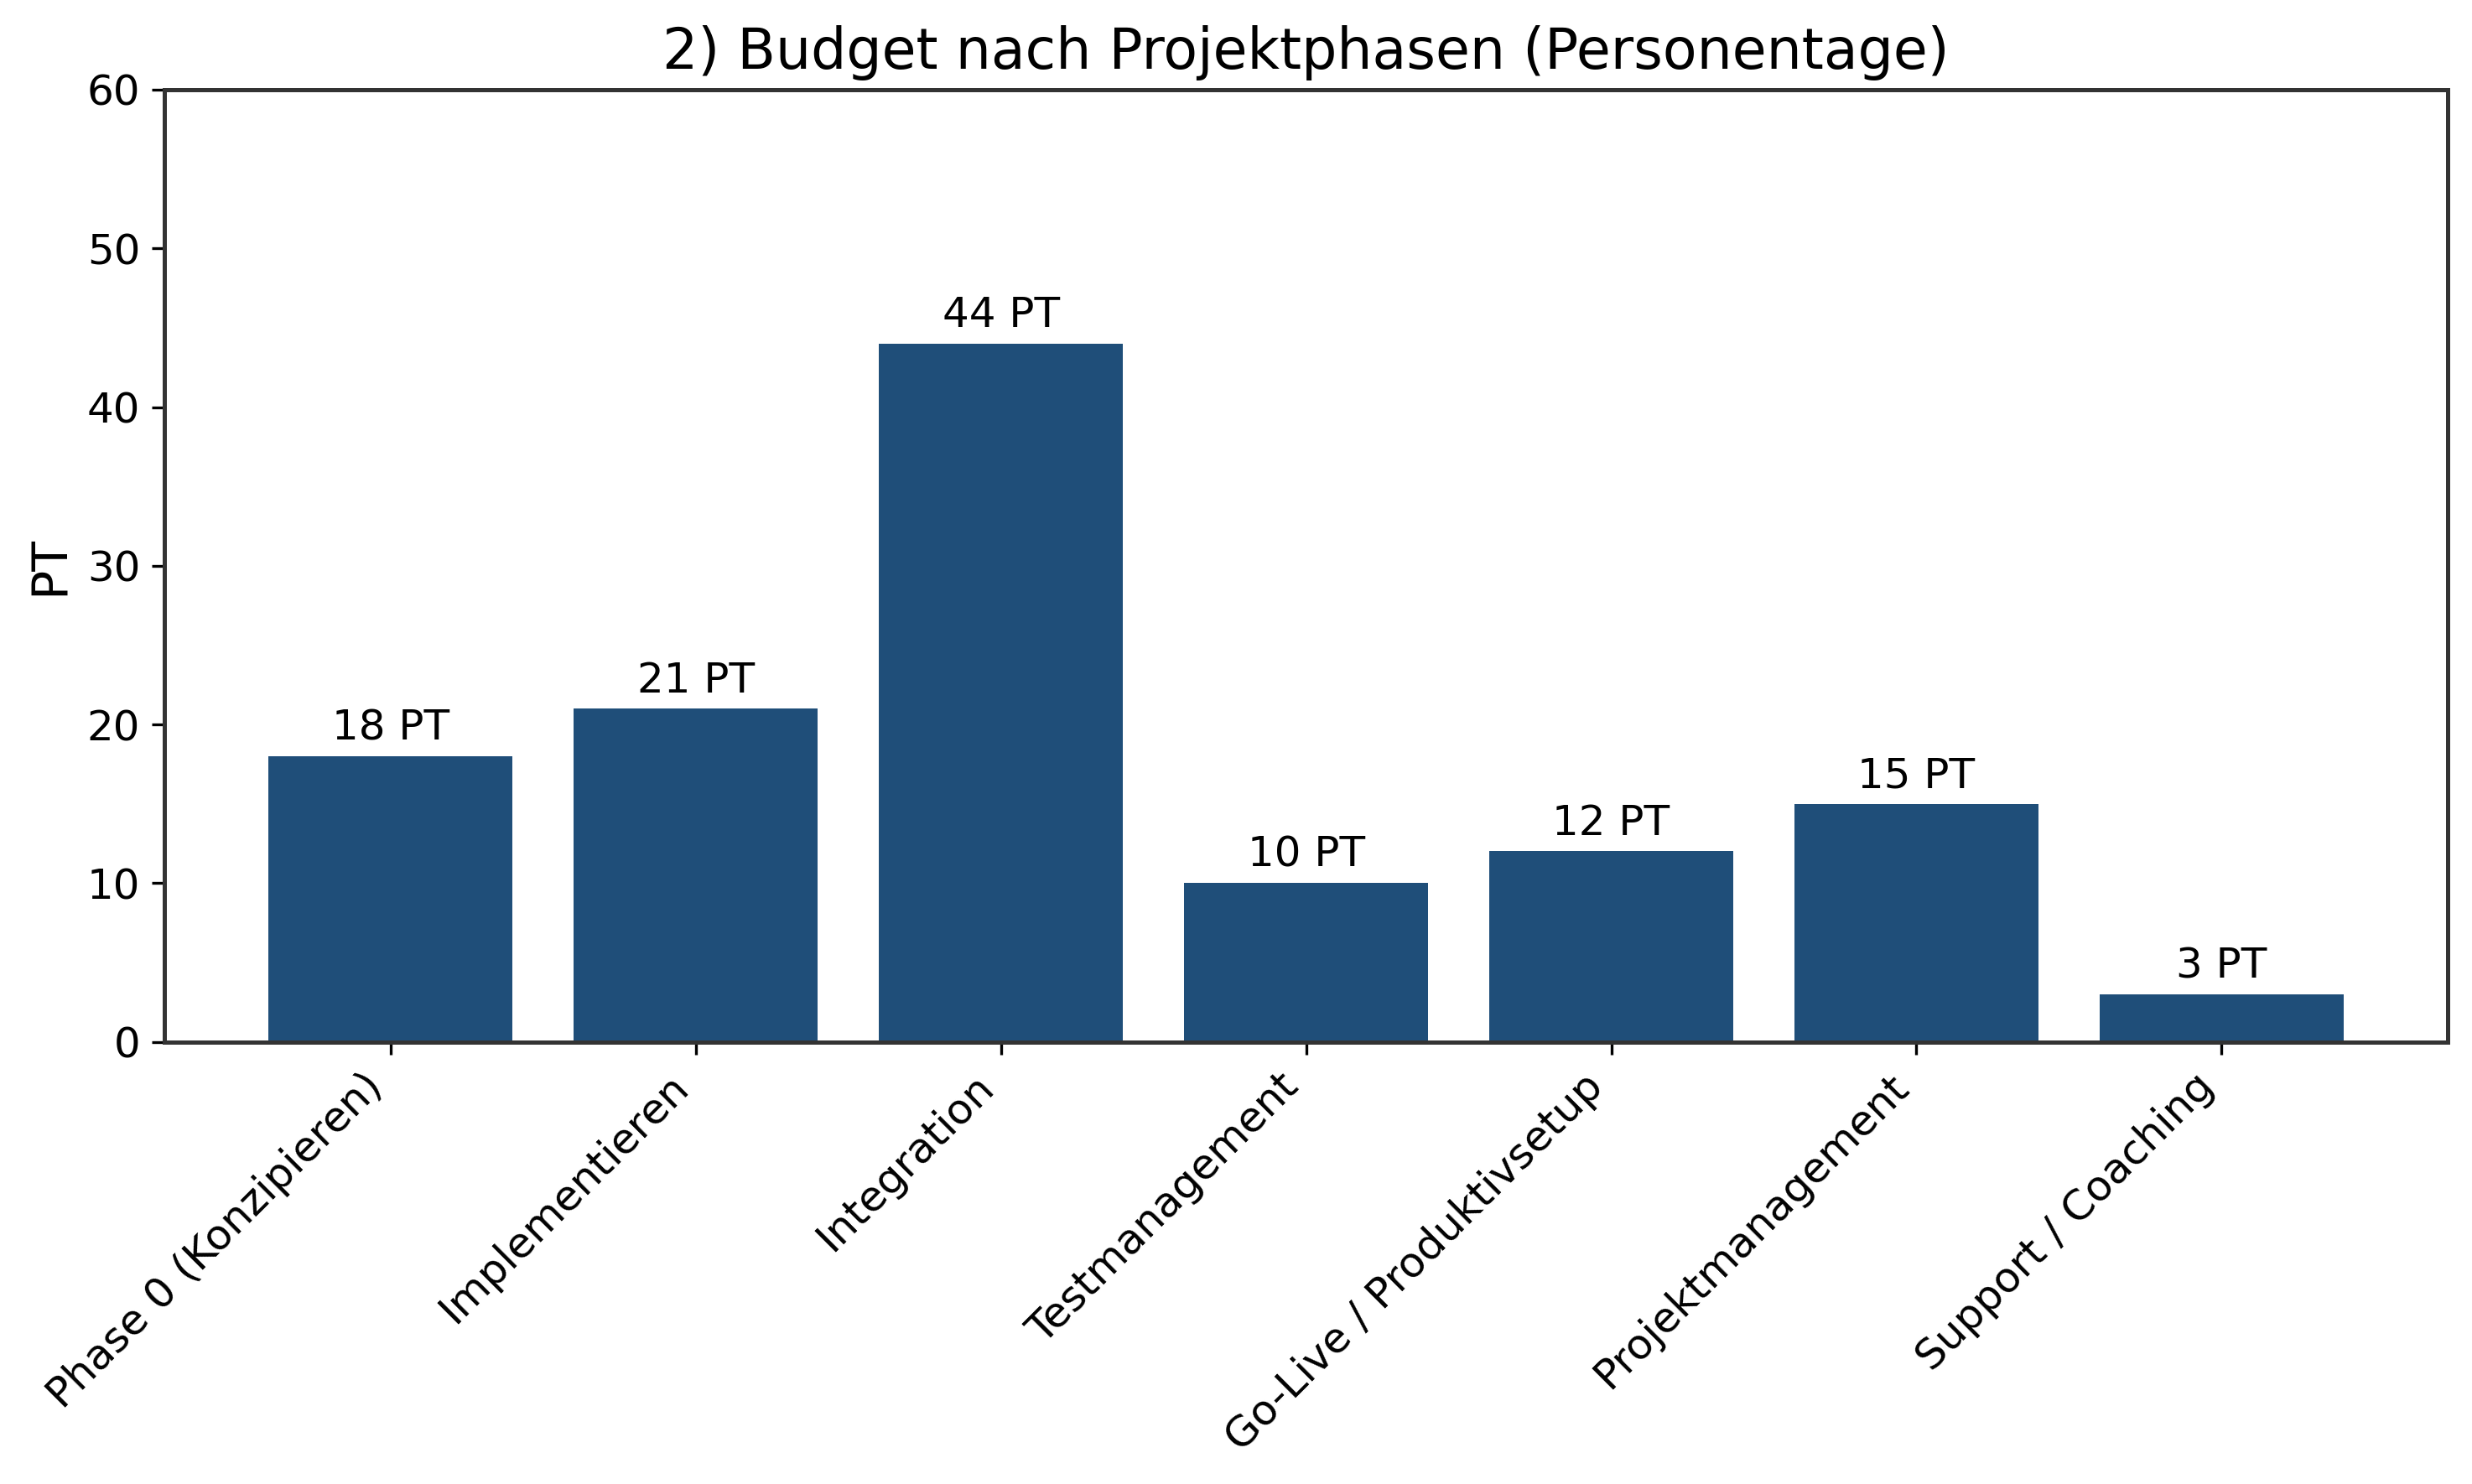

Kurzfassung PT:
Die Integrationsphase hat mit 47 PT den höchsten Aufwand.



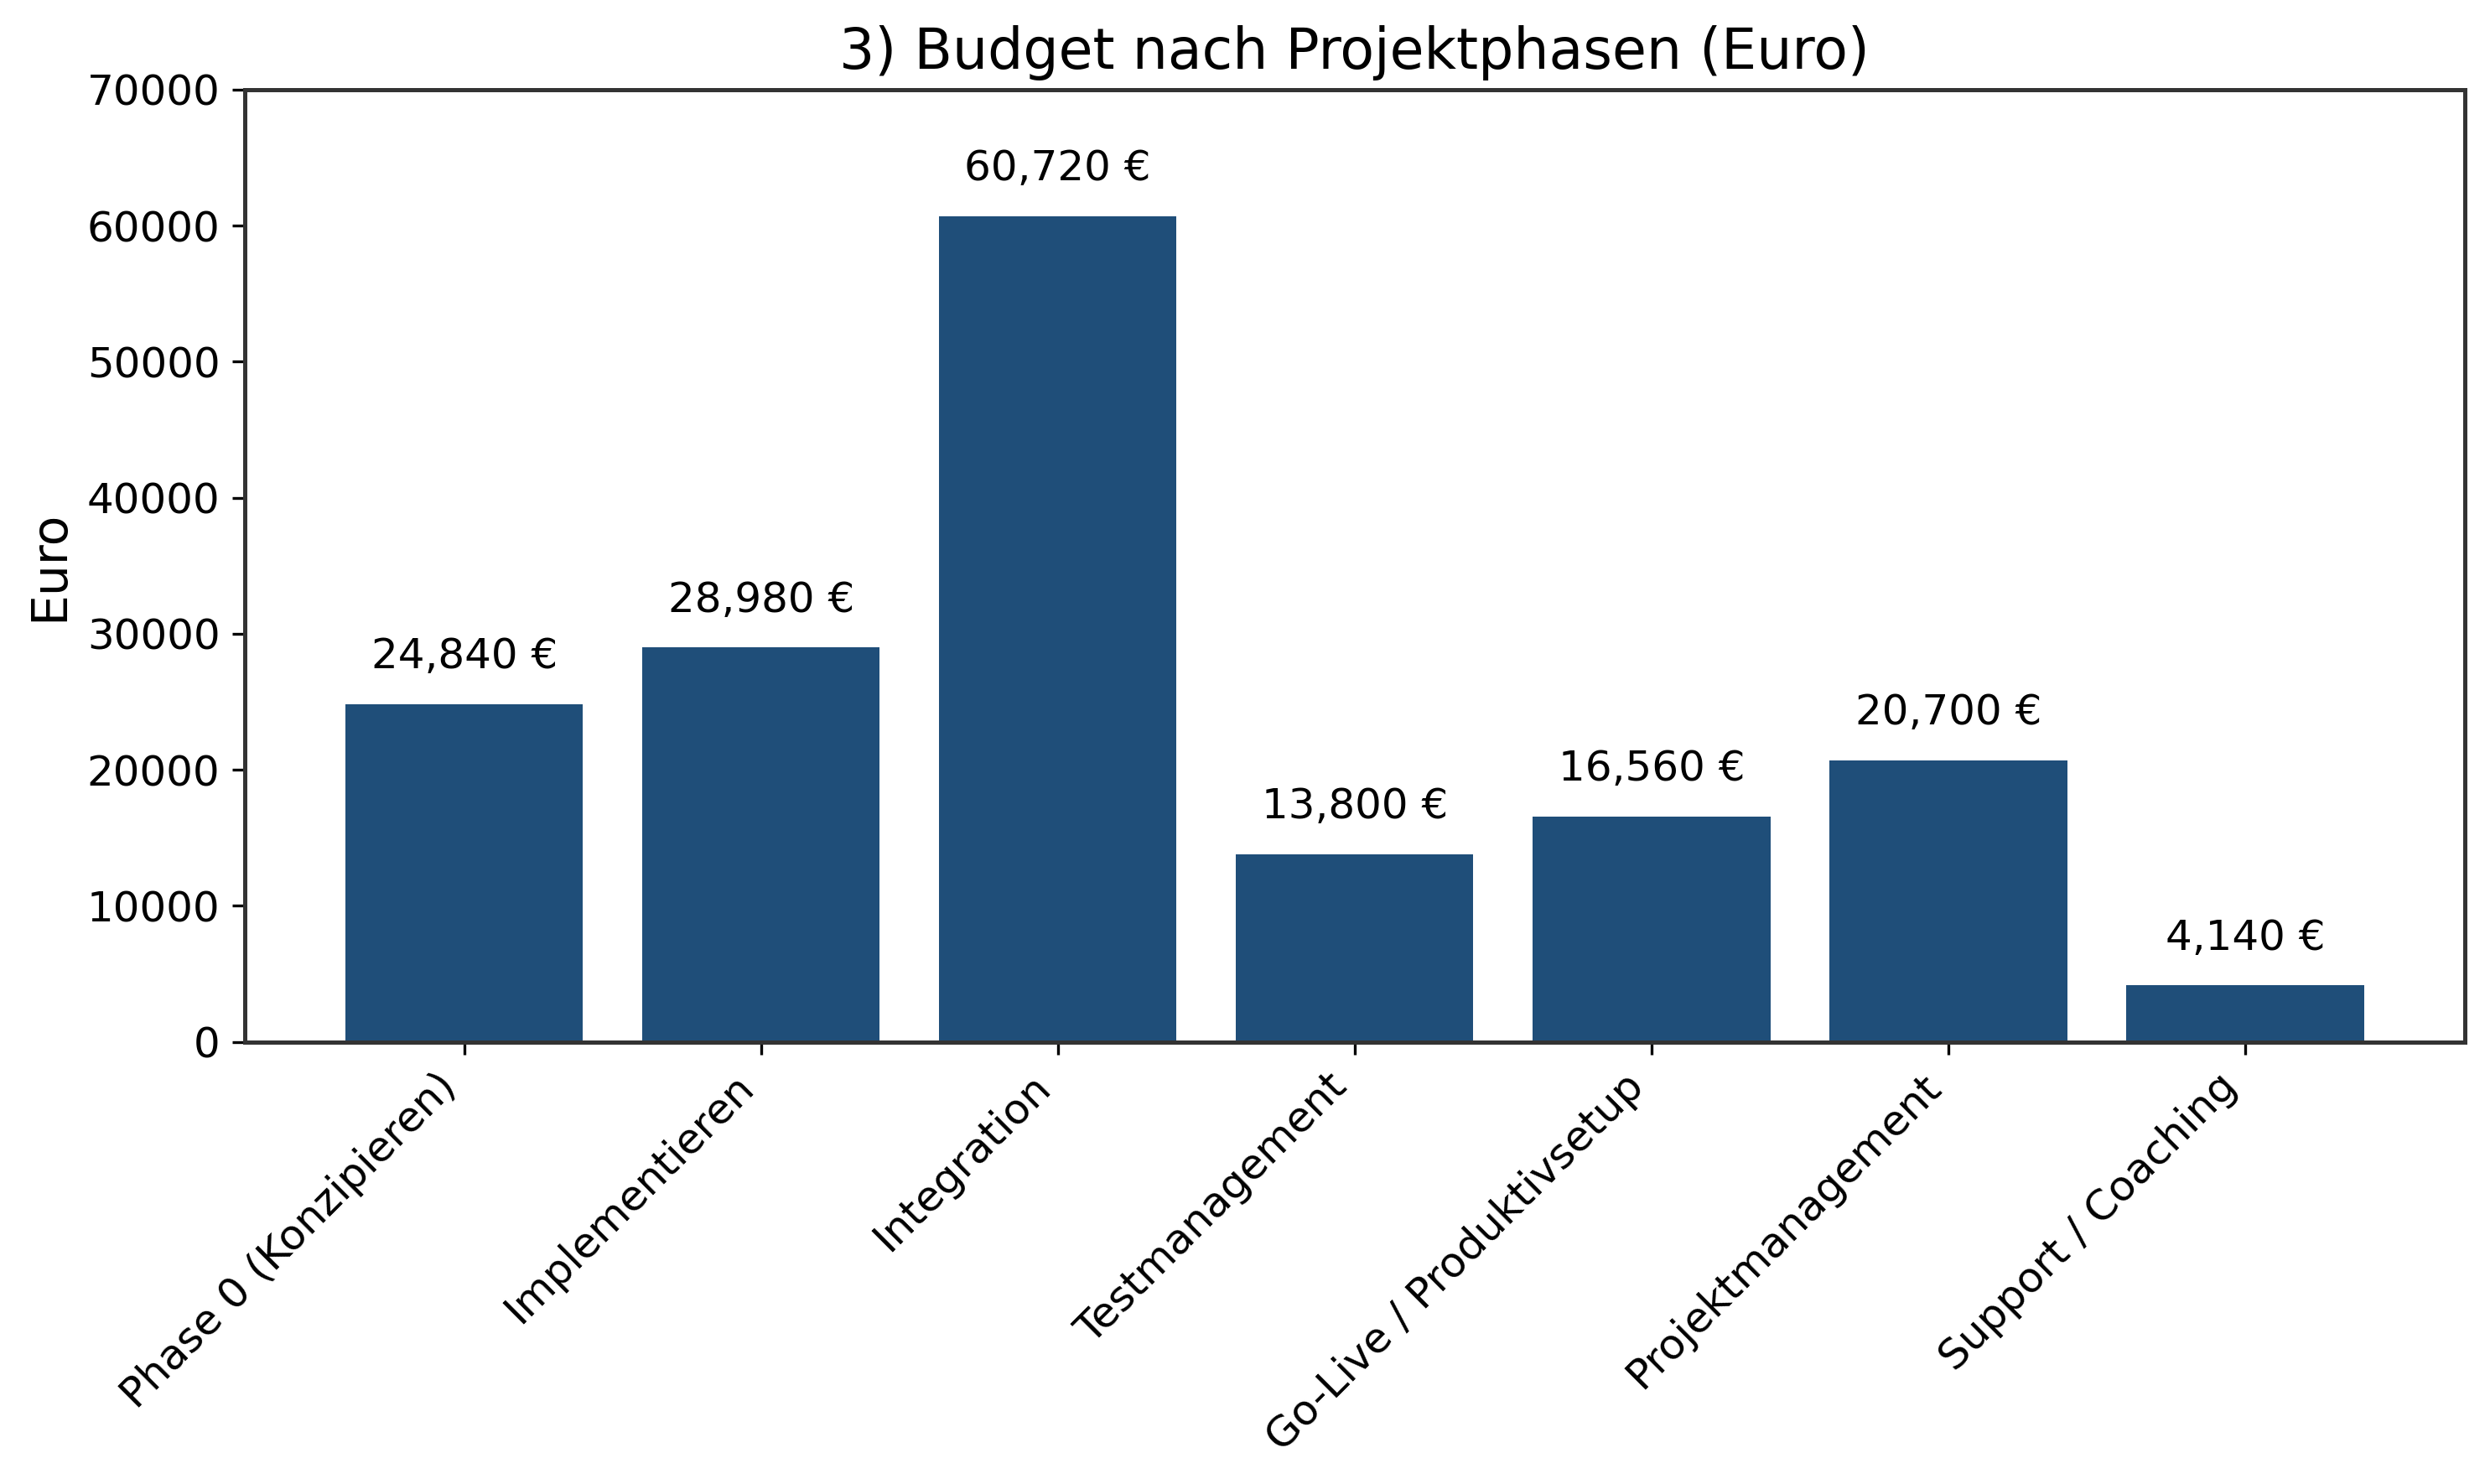

Kurzfassung Kosten:
Die Integrationsphase verursacht den größten Kostenblock.



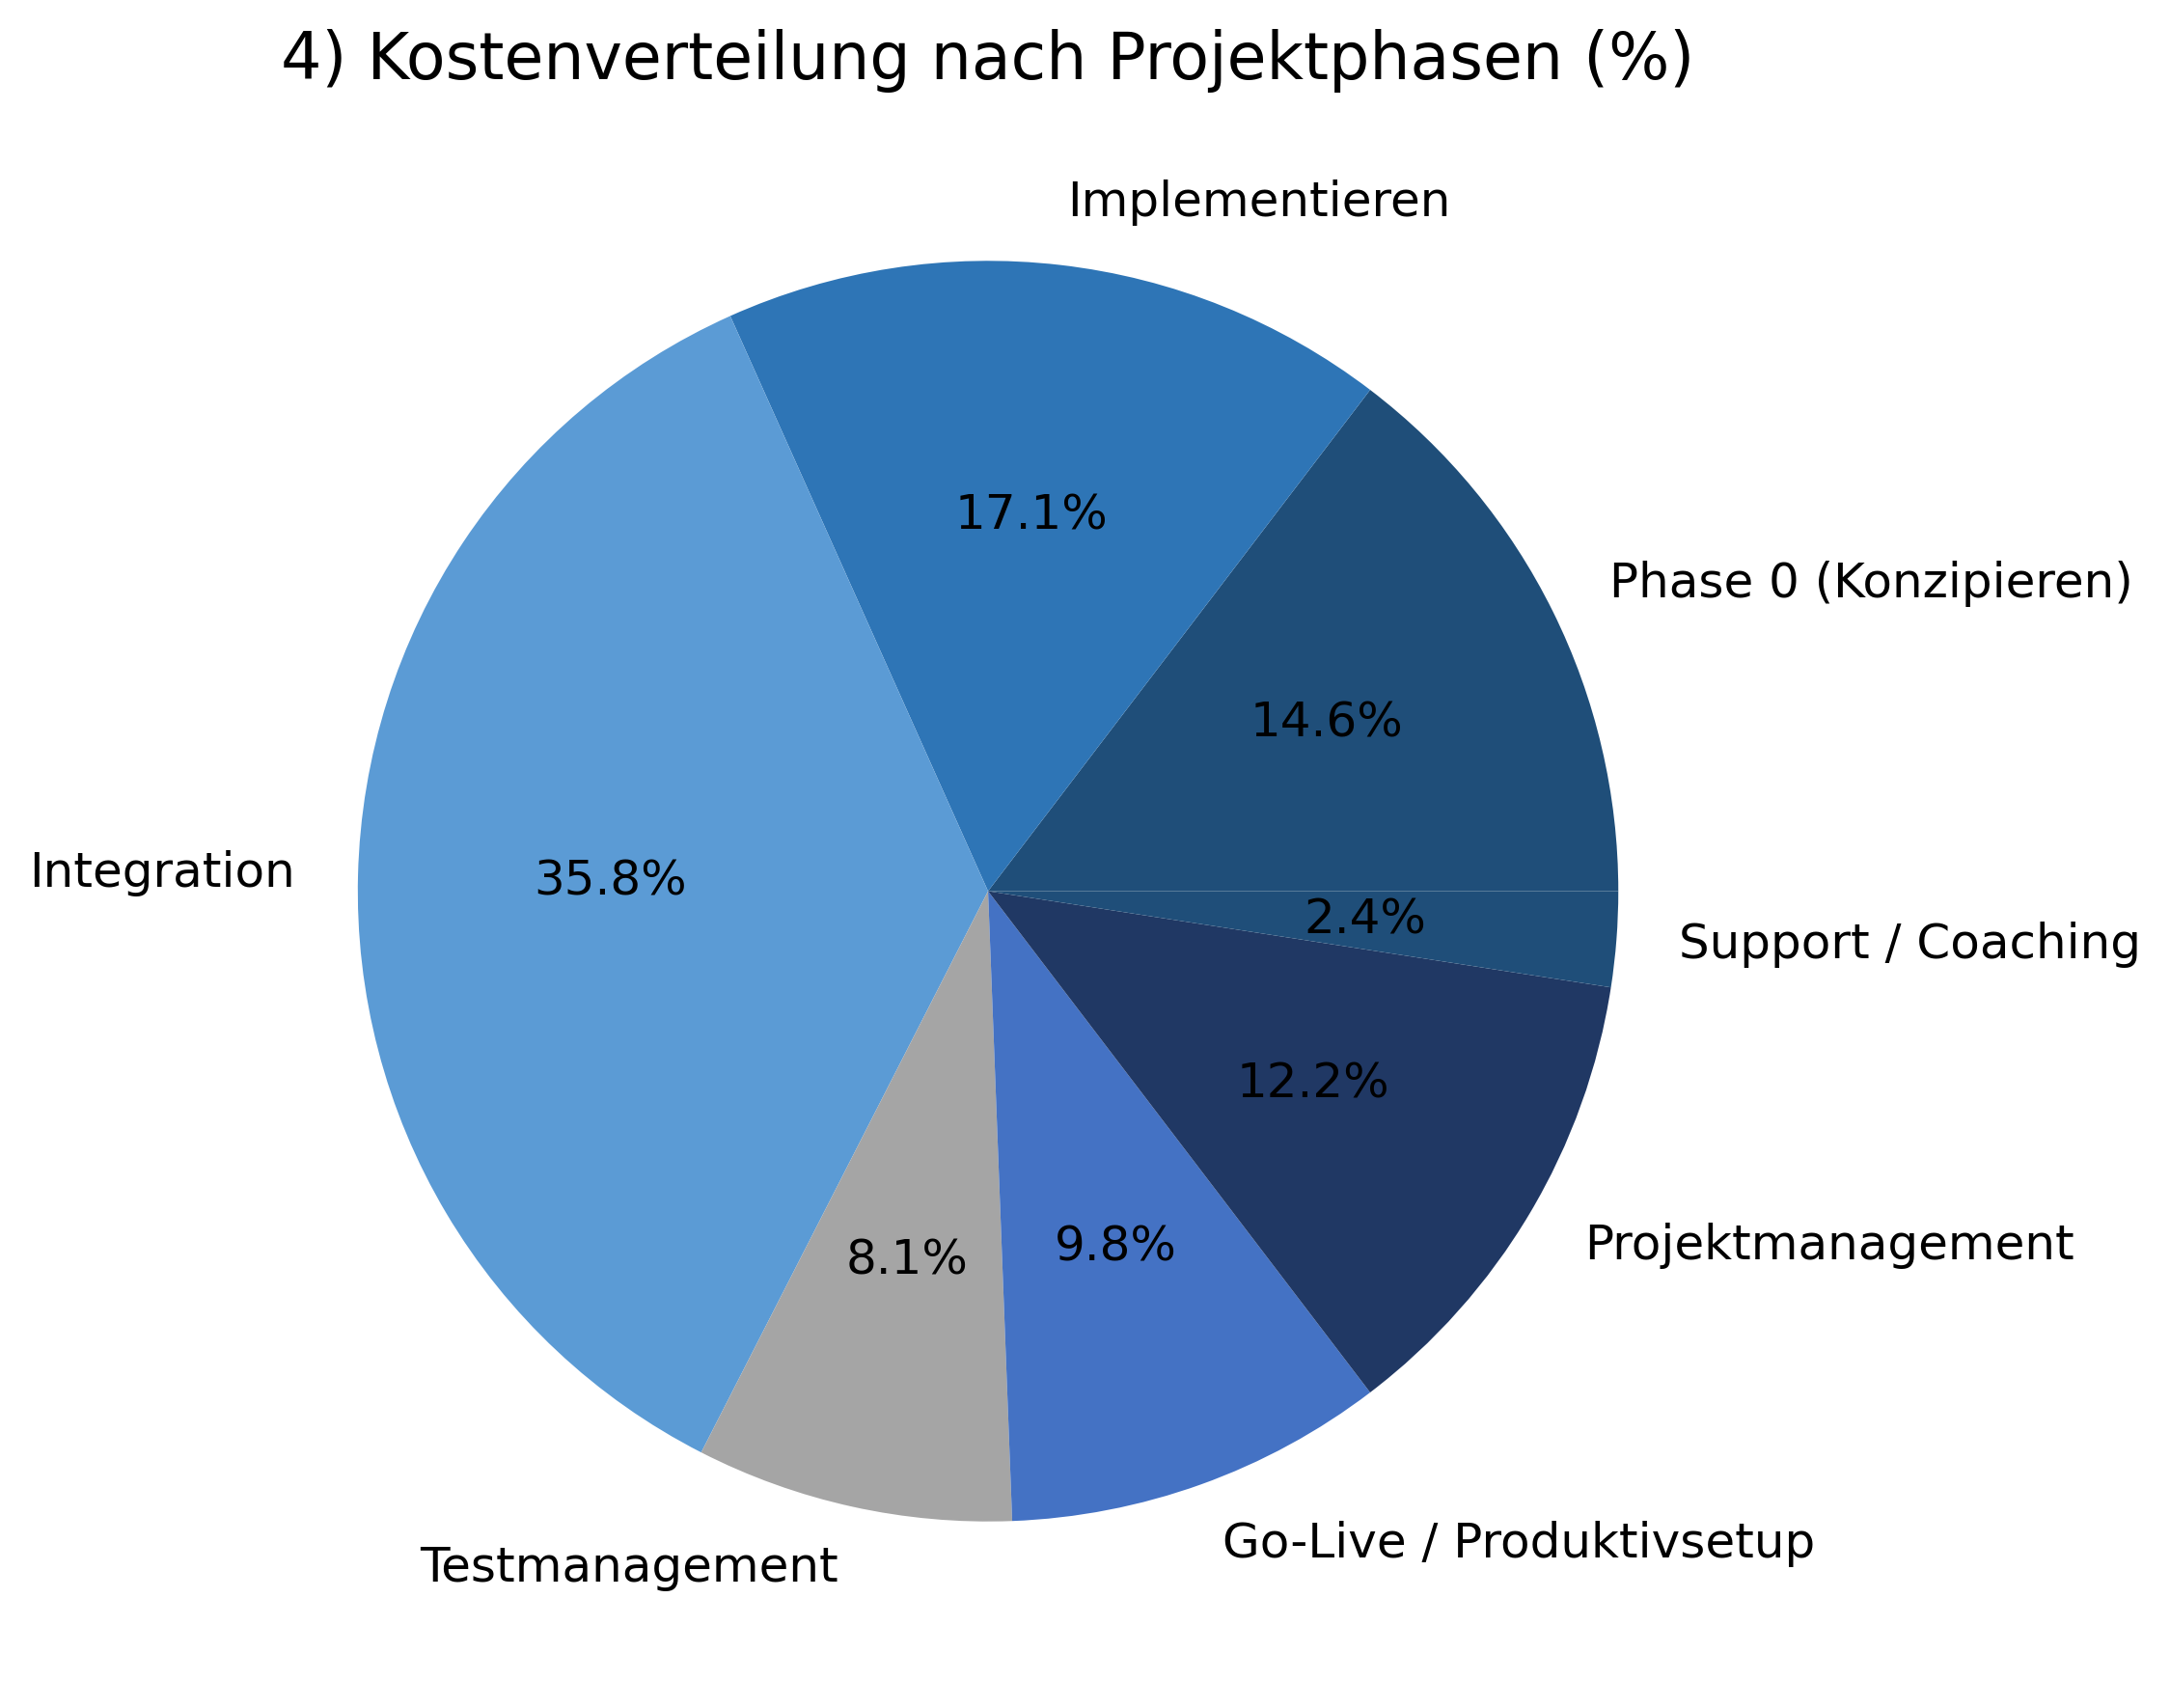

Kurzfassung Verteilung:
Integration und Implementierung dominieren die Gesamtkosten.



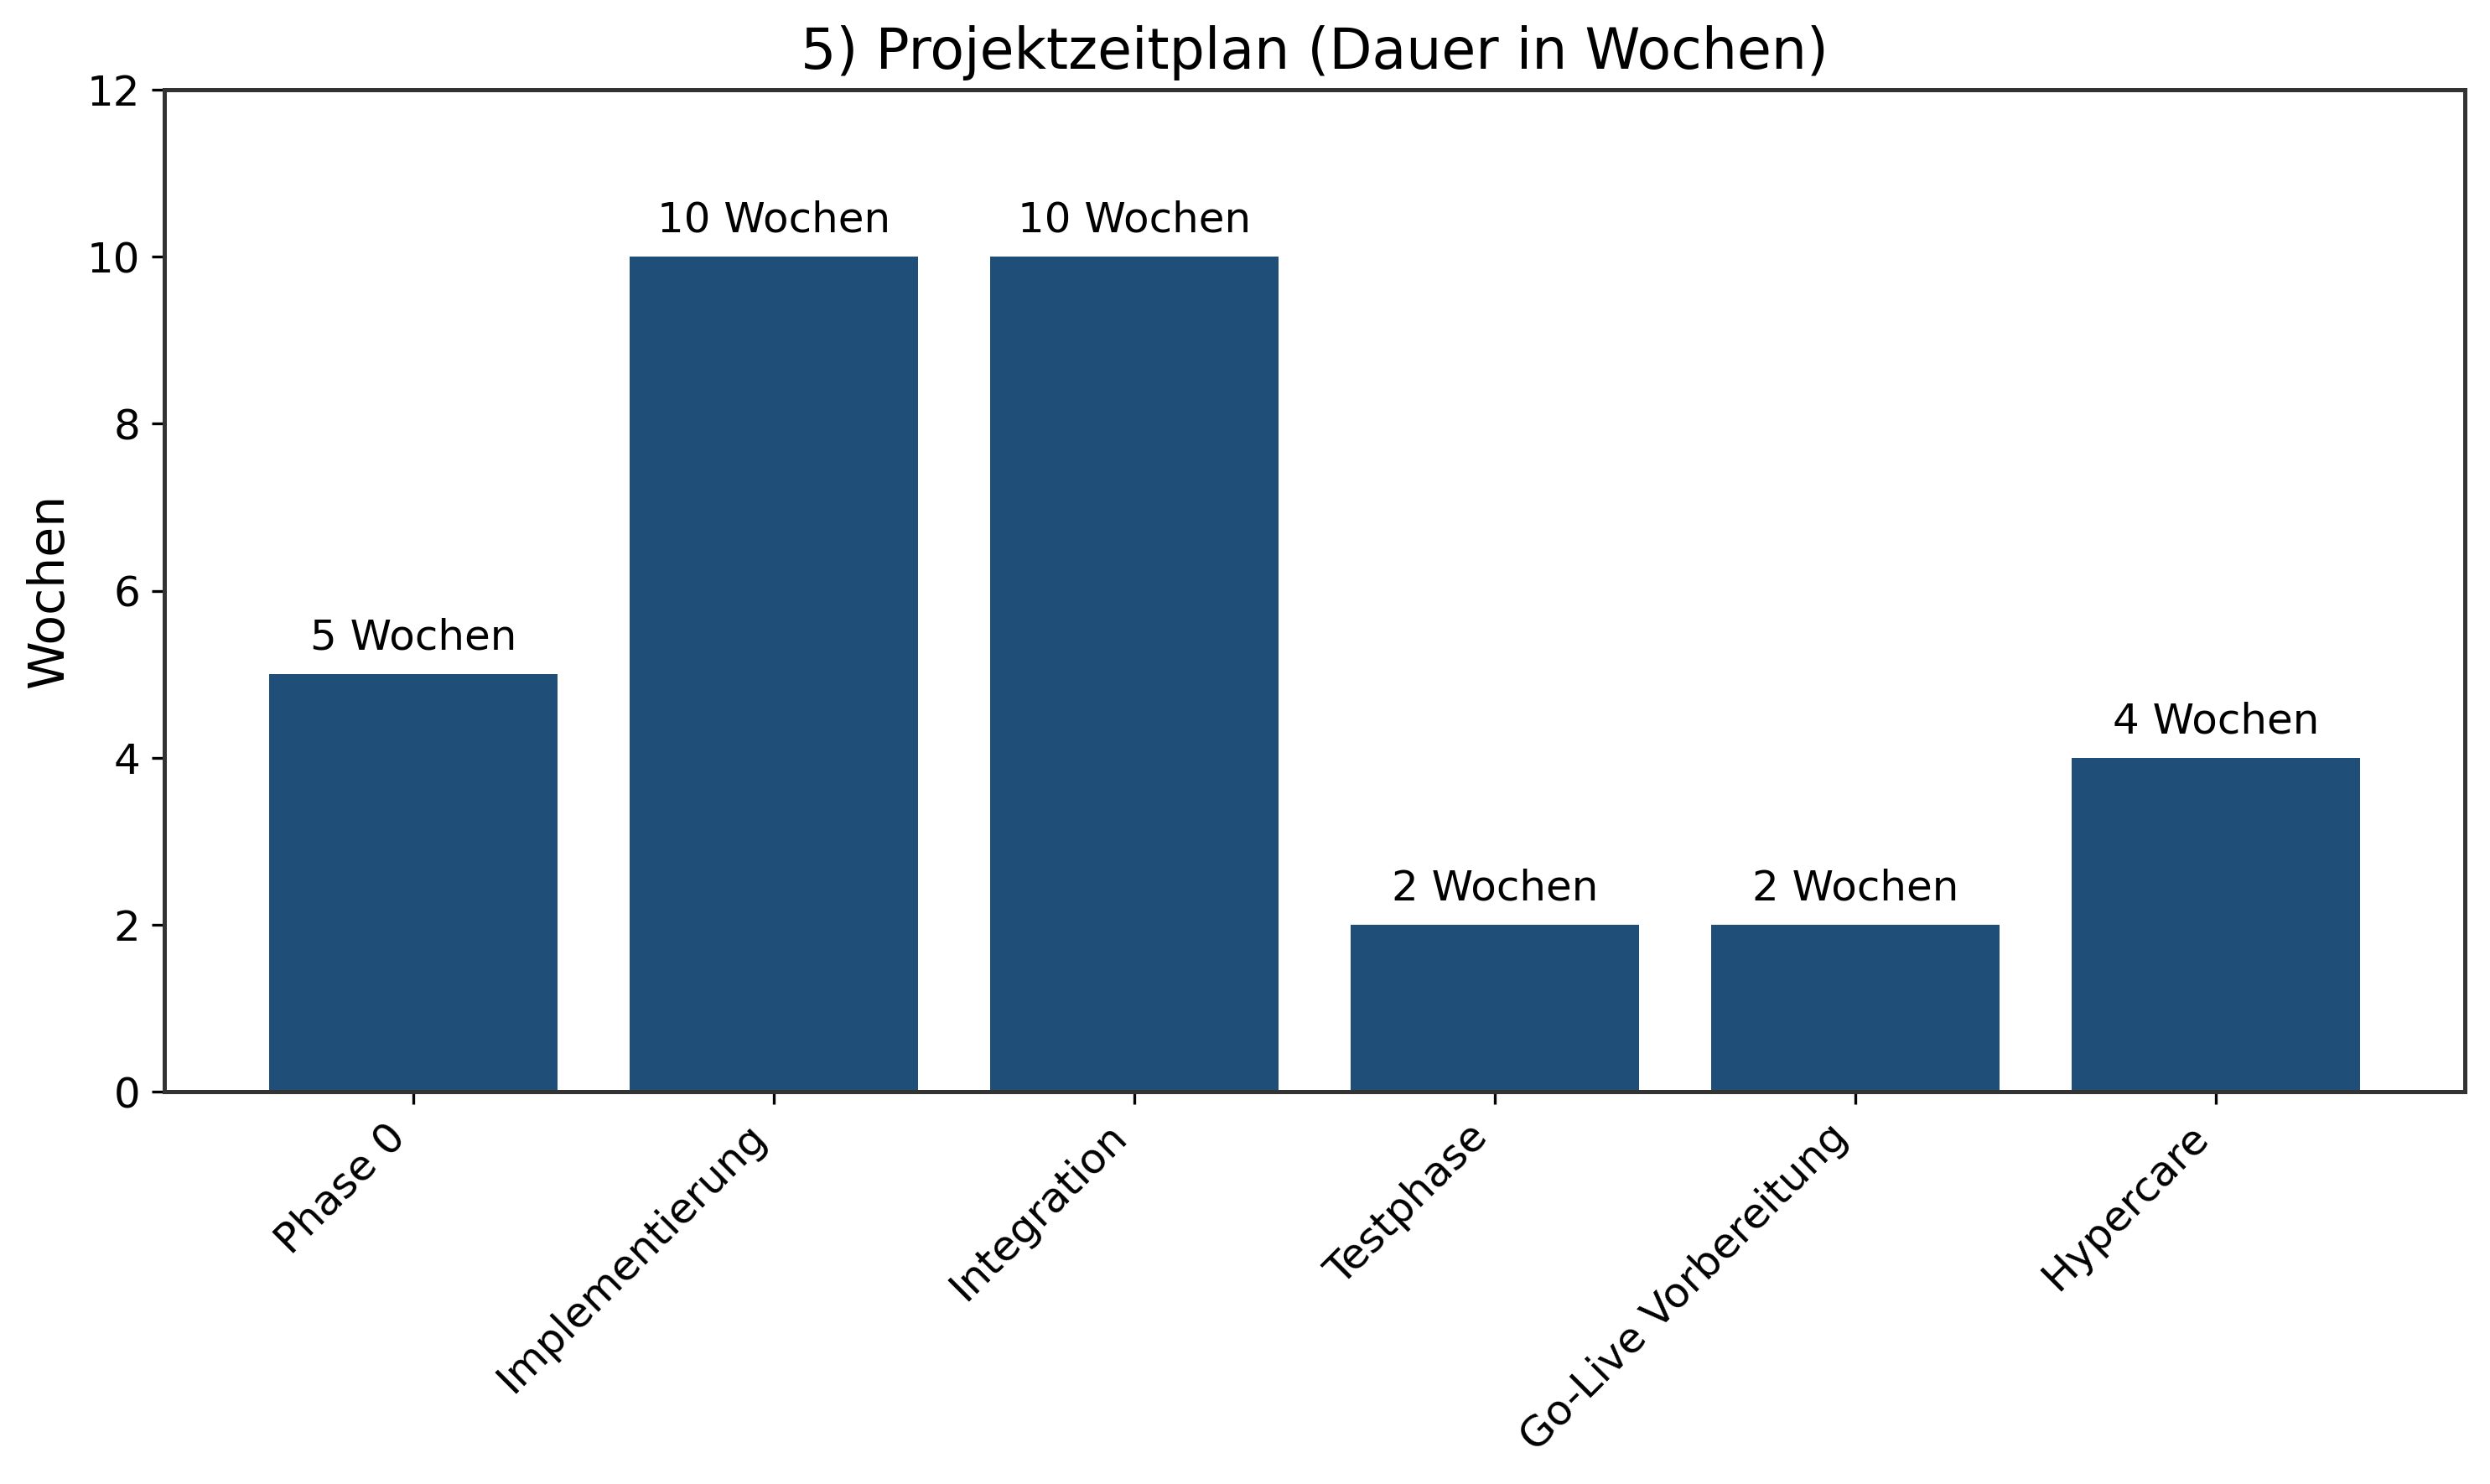

Kurzfassung Timeline:
Implementierung und Integration sind die zeitintensivsten Phasen.



In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import os

output_folder = r"C:\Users\A.Abbas\Documents\CRM\Graphs"
os.makedirs(output_folder, exist_ok=True)


# ==============================================
#          GLOBAL DESIGN SETTINGS (PRINT)
# ==============================================

plt.rcParams.update({
    "figure.figsize": (10, 6),
    "figure.dpi": 300,                     # HIGH DPI for printing
    "axes.titlesize": 16,
    "axes.labelsize": 14,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "font.family": "DejaVu Sans",          # Clean print-friendly font
    "axes.edgecolor": "#333333",
    "axes.linewidth": 1.2,
})

# Color palette (professional print theme)
colors = ["#1F4E79", "#2E75B6", "#5B9BD5", "#A5A5A5", "#4472C4", "#203864"]

# ==============================================
# 1) LIZENZKOSTEN (BAR CHART)
# ==============================================

license_costs = {
    "SAP Sales Cloud V2": 27560,
    "SAP AI Units": 2810,
    "SAP Integration Suite": 16308
}

df_licenses = pd.DataFrame.from_dict(license_costs, orient="index", columns=["Kosten (€)"])

plt.figure()
bars = plt.bar(df_licenses.index, df_licenses["Kosten (€)"], color=colors[0])
plt.title("1) Dreijährliche Lizenzkosten (SAP CX Infrastruktur)")
plt.ylabel("Euro")
plt.xlabel("Lizenztyp")
plt.xticks(rotation=0)

# Skala bis 22.500 €
plt.ylim(0, 30000)

# Labels above bars
for bar in bars:
    yval = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2, yval + 500,
        f"{yval:,.0f} €",
        ha="center", va="bottom", fontsize=12
    )

plt.tight_layout()
plt.savefig(os.path.join(output_folder, "lizenzkosten.png"), dpi=300)
plt.show()

print("Kurzfassung Lizenzkosten:")
print("Die SAP Sales Cloud verursacht den größten jährlichen Kostenanteil.\n")

# ==============================================
# 2) BUDGET NACH PROJEKTPHASEN
# ==============================================

pt_cost = 1380
phases_pt = {
    "Phase 0 (Konzipieren)": 18,
    "Implementieren": 21,
    "Integration": 44,
    "Testmanagement": 10,
    "Go-Live / Produktivsetup": 12,
    "Projektmanagement": 15,
    "Support / Coaching": 3
}

df_budget = pd.DataFrame.from_dict(phases_pt, orient="index", columns=["PT"])
df_budget["Kosten (€)"] = df_budget["PT"] * pt_cost

# ----------------------------- PT BAR CHART ---------------------------

plt.figure()
bars = plt.bar(df_budget.index, df_budget["PT"], color=colors[0])
plt.title("2) Budget nach Projektphasen (Personentage)")
plt.ylabel("PT")
plt.xticks(rotation=45, ha="right")

# *** NEU: Skala bis 60 PT ***
plt.ylim(0, 60)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, f"{yval:.0f} PT",
             ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.savefig(os.path.join(output_folder, "budget_pt.png"), dpi=300)
plt.show()

print("Kurzfassung PT:")
print("Die Integrationsphase hat mit 47 PT den höchsten Aufwand.\n")

# ----------------------------- COST BAR CHART ---------------------------

plt.figure()
bars = plt.bar(df_budget.index, df_budget["Kosten (€)"], color=colors[0])
plt.title("3) Budget nach Projektphasen (Euro)")
plt.ylabel("Euro")
plt.xticks(rotation=45, ha="right")

# Skala bis 70.000 €
plt.ylim(0, 70000)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 2000,
             f"{yval:,.0f} €", ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.savefig(os.path.join(output_folder, "budget_euro.png"), dpi=300)
plt.show()

print("Kurzfassung Kosten:")
print("Die Integrationsphase verursacht den größten Kostenblock.\n")

# ----------------------------- PIE CHART ---------------------------

plt.figure()
df_budget["Kosten (€)"].plot(
    kind="pie",
    autopct="%1.1f%%",
    colors=colors,
    textprops={"fontsize": 12}
)

plt.title("4) Kostenverteilung nach Projektphasen (%)")
plt.ylabel("")
plt.tight_layout()
plt.savefig(os.path.join(output_folder, "budget_pie.png"), dpi=300)
plt.show()

print("Kurzfassung Verteilung:")
print("Integration und Implementierung dominieren die Gesamtkosten.\n")

# ==============================================
# 3) PROJEKTZEITPLAN
# ==============================================

timeline_weeks = {
    "Phase 0": 5,
    "Implementierung": 10,
    "Integration": 10,
    "Testphase": 2,
    "Go-Live Vorbereitung": 2,
    "Hypercare": 4
}

df_timeline = pd.DataFrame.from_dict(timeline_weeks, orient="index", columns=["Wochen"])

plt.figure()
bars = plt.bar(df_timeline.index, df_timeline["Wochen"], color=colors[0])
plt.title("5) Projektzeitplan (Dauer in Wochen)")
plt.ylabel("Wochen")
plt.xticks(rotation=45, ha="right")
plt.ylim(0, 12)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.2,
             f"{yval:.0f} Wochen", ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.savefig(os.path.join(output_folder, "projektzeitplan.png"), dpi=300)
plt.show()

print("Kurzfassung Timeline:")
print("Implementierung und Integration sind die zeitintensivsten Phasen.\n")
